In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.core.pylabtools import figsize
# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from fig_code.figures import *
import mlxtend
from mlxtend.evaluate import bias_variance_decomp
import warnings
warnings.filterwarnings('ignore')


# use seaborn plotting defaults
import seaborn as sns; sns.set()

figsize(14, 7)

# Task 1

In [199]:
# Reading csv files
fistbump = pd.read_csv("/Users/amad/Desktop/495/fistbump_data.csv")
wave = pd.read_csv("/Users/amad/Desktop/495/wave_data.csv")

# Assigning Labels 0 for Wave and 1 for Fistbump

In [200]:
wave["gesture"] = "0"
wave.to_csv("wave_data.csv", index=False)
fistbump["gesture"] = "1"
wave.to_csv("fistbump_data.csv", index=False)

In [201]:
wave

,ax,ay,az,gx,gy,gz,Sample #,gesture
0,0.562,-1.638,-0.650,95.581,-6.287,-65.979,1,0
1,0.519,-1.707,-0.727,96.680,-20.996,-34.546,1,0
2,0.503,-1.709,-0.808,91.980,-38.696,0.000,1,0
3,0.475,-1.624,-0.852,84.534,-60.242,36.804,1,0
4,0.429,-1.518,-0.767,77.454,-86.975,71.777,1,0
...,...,...,...,...,...,...,...,...
5945,0.623,-0.945,-0.253,-0.916,18.555,-11.658,50,0
5946,0.630,-0.940,-0.250,-4.578,8.728,-0.610,50,0
5947,0.656,-0.938,-0.206,-12.878,1.343,15.015,50,0
5948,0.695,-0.910,-0.188,-21.301,-2.869,28.748,50,0


In [202]:
fistbump

,ax,ay,az,gx,gy,gz,Sample #,gesture
0,3.280,-0.822,4.000,88.684,-71.655,122.192,1,1
1,1.528,-0.257,2.544,-7.080,-31.433,173.645,1,1
2,0.421,-0.513,0.813,18.677,62.317,77.026,1,1
3,0.801,0.178,0.850,68.298,77.942,22.461,1,1
4,1.108,0.139,1.143,101.868,66.223,-15.625,1,1
...,...,...,...,...,...,...,...,...
5945,0.909,0.136,0.227,-16.235,-16.541,13.184,50,1
5946,0.903,0.141,0.224,-15.442,-15.137,11.414,50,1
5947,0.896,0.145,0.223,-13.184,-13.367,8.179,50,1
5948,0.894,0.127,0.230,-10.559,-11.658,4.578,50,1


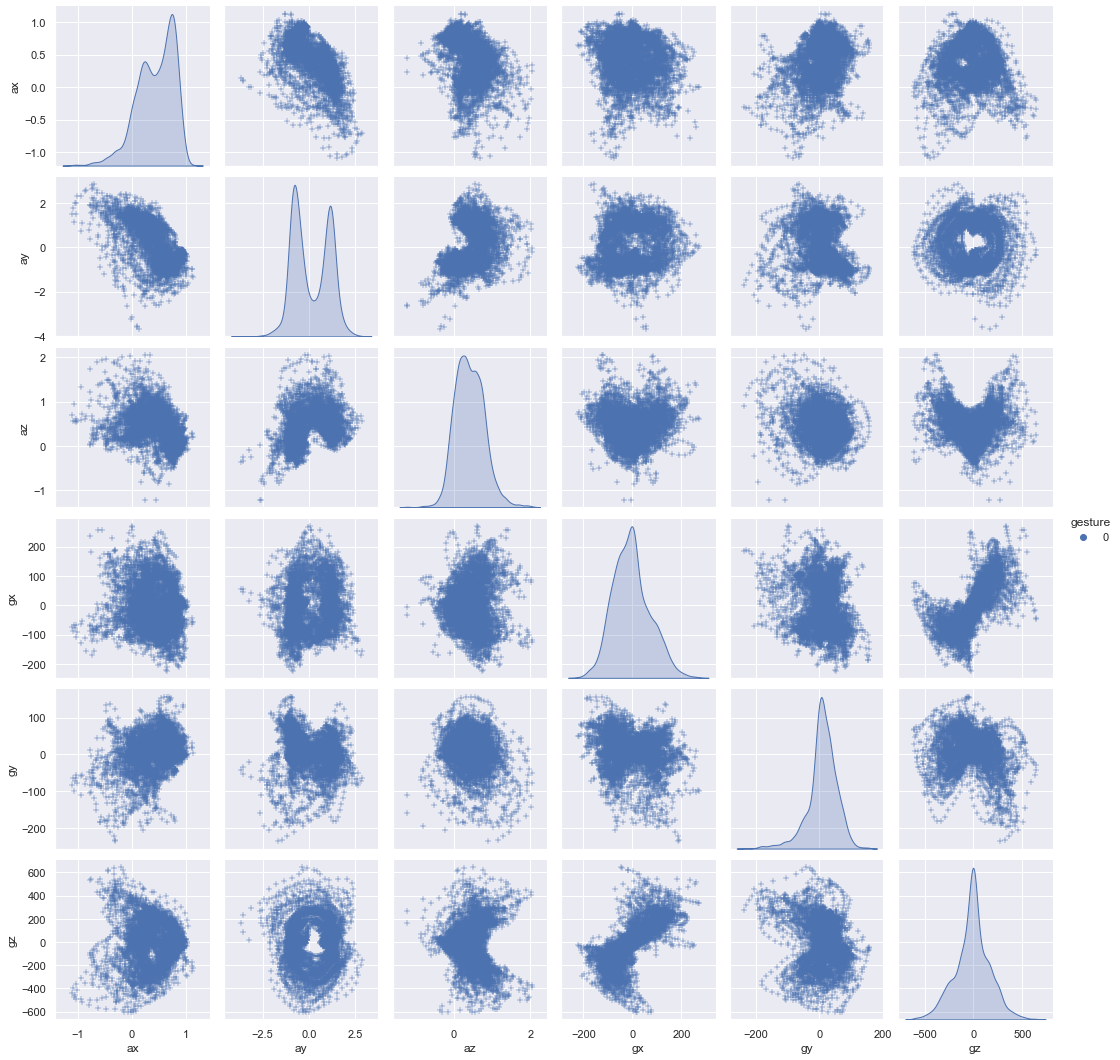

In [106]:
tmp = wave.drop('Sample #',axis=1)
g = sns.pairplot(tmp, hue='gesture', markers='+')
plt.show()


# Merging Both csv files and randomizing Labels

In [203]:
frames = [wave, fistbump]
mged = pd.concat(frames)

indx = np.arange(len(mged))
rndmged = np.random.permutation(indx)


rndmged=mged.sample(frac=1).reset_index(drop=True)

rndmged.to_csv('/Users/amad/Desktop/495/gesture.csv', index=False)

# Creating a New CSV file with both gestures

In [204]:
gesture = pd.read_csv("/Users/amad/Desktop/495/gesture.csv")

In [205]:
gesture.shape

(11900, 8)

In [206]:
tmp = gesture.drop('Sample #',axis=1)


In [207]:
tmp

,ax,ay,az,gx,gy,gz,gesture
0,0.297,0.996,0.841,58.533,22.827,130.920,0
1,0.578,0.095,0.690,-78.552,-9.705,-178.406,0
2,0.988,-0.062,-0.120,-22.644,-29.236,21.973,1
3,0.984,-0.528,-0.454,-95.947,34.180,12.817,1
4,1.007,-0.083,-0.104,-30.640,-23.804,19.470,1
...,...,...,...,...,...,...,...
11895,0.765,-1.077,-0.062,11.353,18.921,-1.099,0
11896,0.391,-0.662,-0.200,189.209,-98.511,-26.978,0
11897,0.461,0.405,0.870,127.319,-21.545,176.208,0
11898,0.951,-0.173,0.265,-21.545,-2.869,-7.324,1


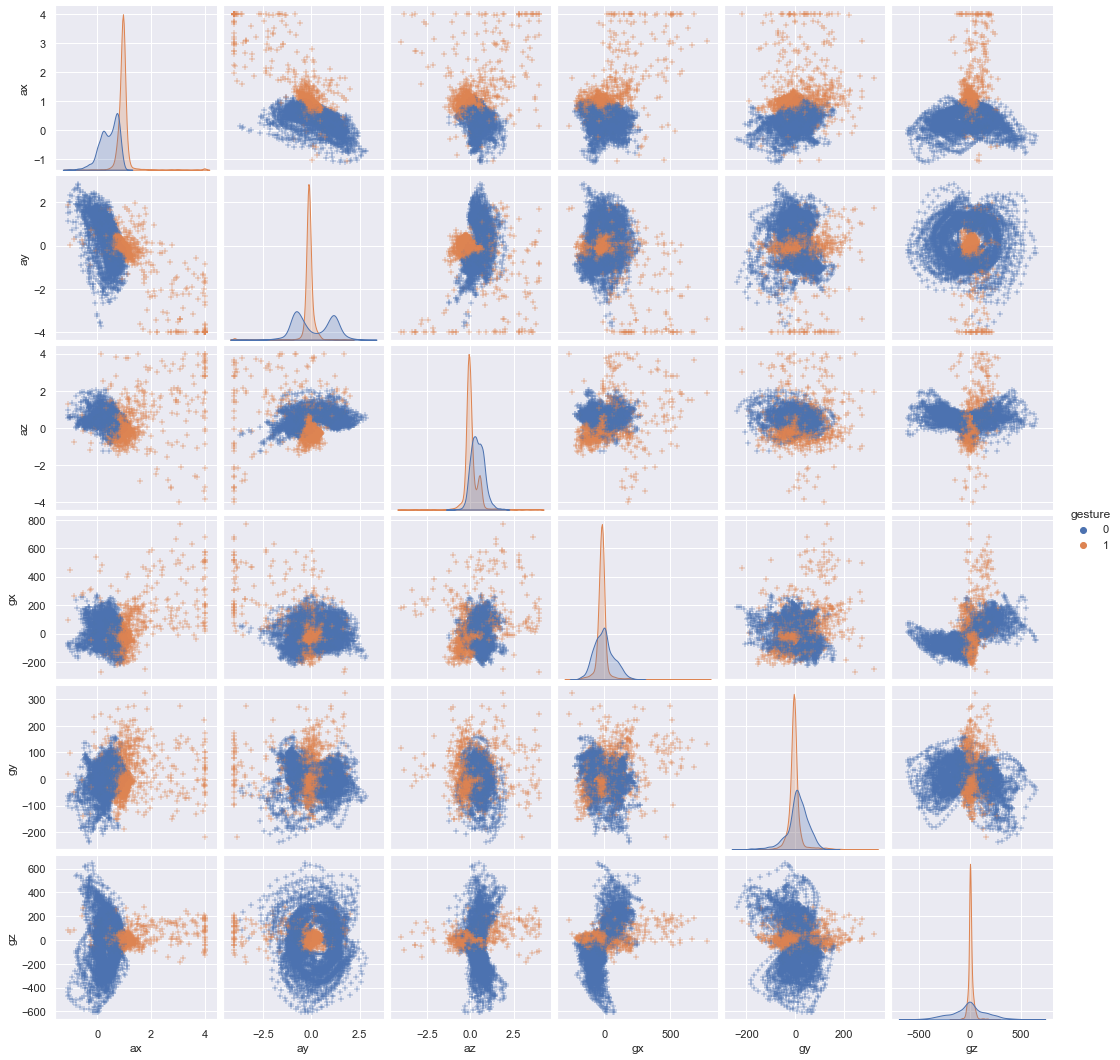

In [208]:
g = sns.pairplot(tmp, hue ='gesture', markers='+')
plt.show()

In [209]:
# droping labels and sample number and assigning it to X
X = gesture.drop(['Sample #', 'gesture'], axis=1)
# Assigning Labels to y
y = gesture['gesture']


In [210]:
X

,ax,ay,az,gx,gy,gz
0,0.297,0.996,0.841,58.533,22.827,130.920
1,0.578,0.095,0.690,-78.552,-9.705,-178.406
2,0.988,-0.062,-0.120,-22.644,-29.236,21.973
3,0.984,-0.528,-0.454,-95.947,34.180,12.817
4,1.007,-0.083,-0.104,-30.640,-23.804,19.470
...,...,...,...,...,...,...
11895,0.765,-1.077,-0.062,11.353,18.921,-1.099
11896,0.391,-0.662,-0.200,189.209,-98.511,-26.978
11897,0.461,0.405,0.870,127.319,-21.545,176.208
11898,0.951,-0.173,0.265,-21.545,-2.869,-7.324


In [211]:
y

0        0
1        0
2        1
3        1
4        1
        ..
11895    0
11896    0
11897    0
11898    1
11899    1
Name: gesture, Length: 11900, dtype: int64

In [212]:
# Splitting the dataset into test and training datasets (80:20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9520, 6)
(9520,)
(2380, 6)
(2380,)


In [213]:
X_train

,ax,ay,az,gx,gy,gz
1844,0.979,-0.201,-0.022,-14.893,-5.676,2.563
5398,0.696,-0.693,0.082,97.778,-12.756,56.580
1909,0.974,-0.158,-0.094,-7.812,14.160,22.156
9288,0.927,-0.215,0.224,-27.100,-13.489,-16.724
8179,0.953,-0.204,-0.178,-10.742,-3.418,19.470
...,...,...,...,...,...,...
3046,0.588,-0.998,0.134,-68.787,87.341,-46.936
9917,0.139,1.709,0.345,62.561,-4.150,101.685
4079,0.232,1.281,0.317,20.386,52.551,16.602
2254,0.981,-0.138,-0.227,-18.982,1.709,-4.089


# Logistic Regression

In [214]:
# Fitting model and predicting test dataset
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.9226890756302522


In [215]:
# Bias, variance and mean square error
mse, bias, var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,predicted))

MSE from bias_variance lib [avg expected loss]: 0.078
Avg Bias: 0.076
Avg Variance: 0.003
Mean Square error by Sckit-learn lib: 0.077


In [216]:
# Probability of prediction
clf.predict_proba(X_test)

array([[0.01927737, 0.98072263],
       [0.02740228, 0.97259772],
       [0.00488474, 0.99511526],
       ...,
       [0.99690579, 0.00309421],
       [0.93803122, 0.06196878],
       [0.84566749, 0.15433251]])

In [217]:
# Score of probability
clf.score(X_test, y_test)

0.9218487394957983

# Precision, Recall and F-1 score  for Logistic Reg

In [218]:
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1206
           1       0.92      0.92      0.92      1174

    accuracy                           0.92      2380
   macro avg       0.92      0.92      0.92      2380
weighted avg       0.92      0.92      0.92      2380



# Confusion Matrix for Logistic Regression for Logistic Reg

In [219]:
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[1117   89]
 [  95 1079]]


# Decision Tree

In [220]:
# Fitting model and predicting test dataset
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

In [221]:
# Bias, variance and mean square error
mse, bias, var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,predicted))

MSE from bias_variance lib [avg expected loss]: 0.016
Avg Bias: 0.007
Avg Variance: 0.009
Mean Square error by Sckit-learn lib: 0.010


In [222]:
# Probability of prediction and score of probability
clf.predict_proba(X_test)
clf.score(X_test, y_test)


0.9844537815126051

In [223]:
predicted.shape

(2380,)

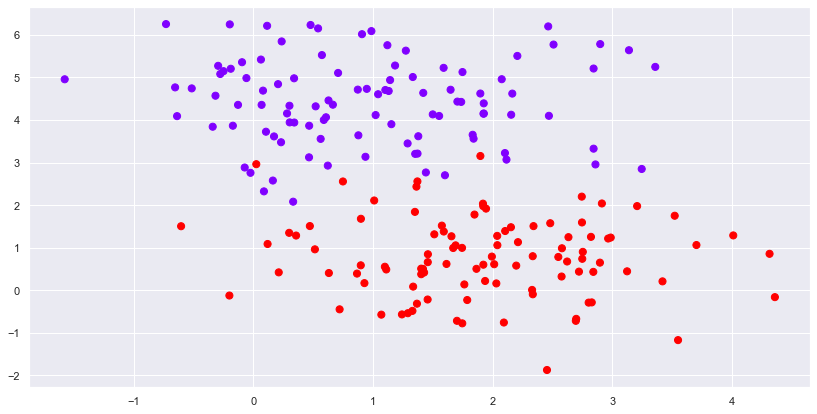

In [224]:
# Plotting some features of the data
X, y = make_blobs(n_samples= 200, centers=2,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

# Precision, Recall and F-1 score  for Decision Tree

In [225]:
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))


Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1206
           1       0.99      0.98      0.99      1174

    accuracy                           0.99      2380
   macro avg       0.99      0.99      0.99      2380
weighted avg       0.99      0.99      0.99      2380



In [226]:
predicted.shape

(2380,)

[Text(390.9149914253049, 528.5, 'X[0] <= 0.808\ngini = 0.5\nsamples = 9520\nvalue = [4788, 4732]'),
 Text(207.98737614329266, 498.3, 'X[0] <= 0.675\ngini = 0.211\nsamples = 4804\nvalue = [4229, 575]'),
 Text(91.04182545731707, 468.1, 'X[2] <= -0.226\ngini = 0.077\nsamples = 3435\nvalue = [3298, 137]'),
 Text(37.42682926829268, 437.9, 'X[1] <= -0.232\ngini = 0.49\nsamples = 105\nvalue = [60, 45]'),
 Text(30.621951219512194, 407.70000000000005, 'X[3] <= 201.263\ngini = 0.091\nsamples = 63\nvalue = [60, 3]'),
 Text(23.817073170731707, 377.5, 'X[3] <= -104.736\ngini = 0.032\nsamples = 61\nvalue = [60, 1]'),
 Text(17.01219512195122, 347.3, 'X[2] <= -0.496\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(10.207317073170731, 317.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(23.817073170731707, 317.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(30.621951219512194, 347.3, 'gini = 0.0\nsamples = 59\nvalue = [59, 0]'),
 Text(37.42682926829268, 377.5, 'gini = 0.0\nsamples = 2\nvalue 

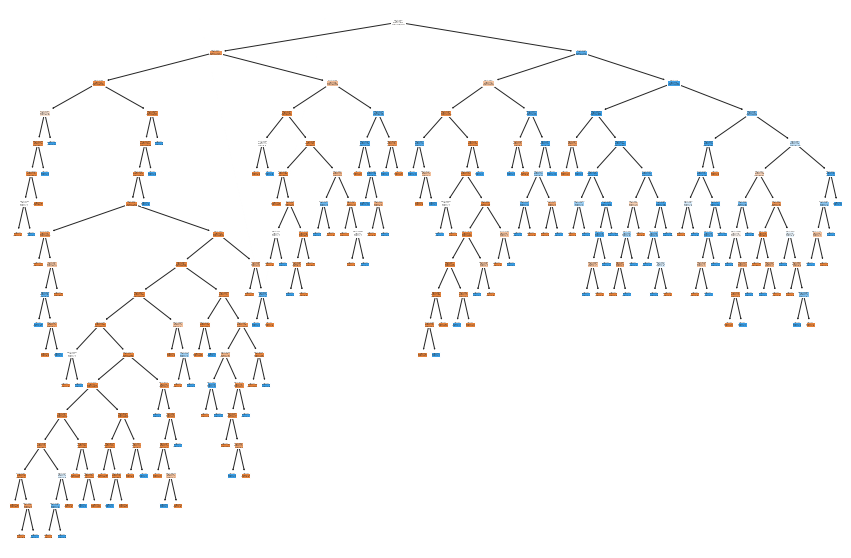

In [128]:
# Plotting tree
plt.figure(figsize = (15,10))
tree.plot_tree(clf, filled = True)

# CONFUSION MATRIX FOR Decision Tree

In [227]:
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[1200    6]
 [  18 1156]]


<Figure size 1008x504 with 0 Axes>

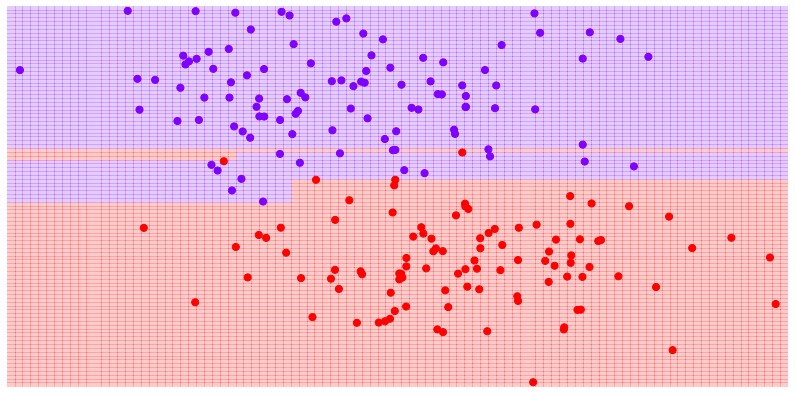

<Figure size 1008x504 with 0 Axes>

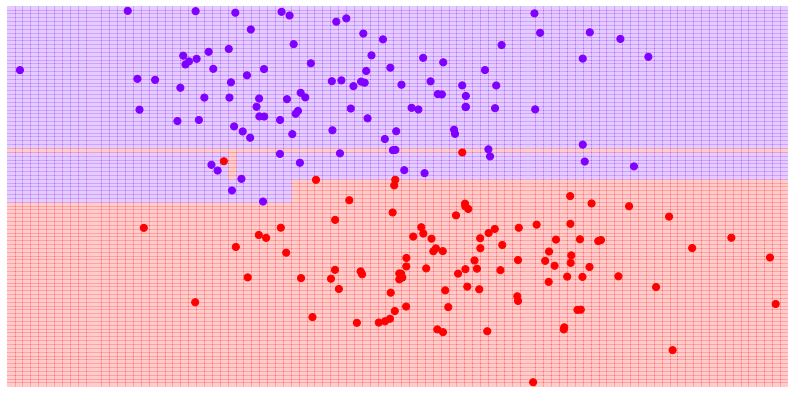

In [228]:
# Plotting tree
plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

In [229]:

plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', options=(1, 5), value=1), Output()), _dom_classes=('widget…

In [230]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=2,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

# Random Forest

In [231]:
# FItting the model and predicting test dataset
clf = RandomForestClassifier(n_estimators=100, random_state=50)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [232]:
# Bias, variance and mean square error
mse, bias, var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,predicted))

MSE from bias_variance lib [avg expected loss]: 0.007
Avg Bias: 0.006
Avg Variance: 0.002
Mean Square error by Sckit-learn lib: 0.007


In [177]:
# Probability of prediction
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.9941176470588236

# Precision, Recall and F 1 Score for Random Forest

In [178]:
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1191
           1       0.99      0.99      0.99      1189

    accuracy                           0.99      2380
   macro avg       0.99      0.99      0.99      2380
weighted avg       0.99      0.99      0.99      2380



# CONFUSION MATRIX FOR RF

In [179]:
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[1185    6]
 [   8 1181]]


/Users/amad/fig_code/figures.py:72: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')


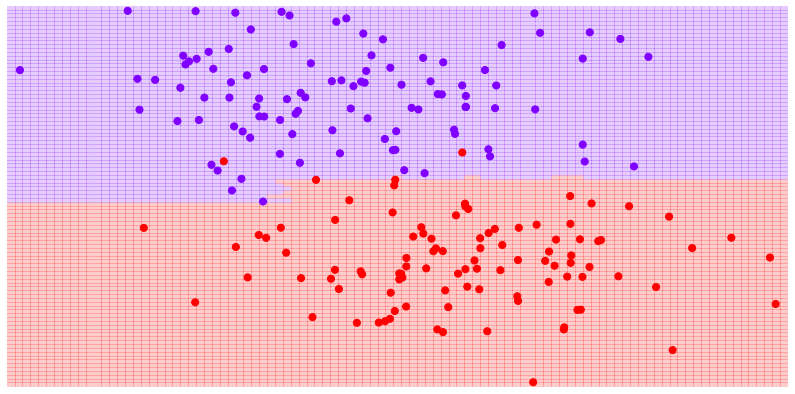

In [180]:
# Plotting trees
visualize_tree(clf, X, y, boundaries=False);

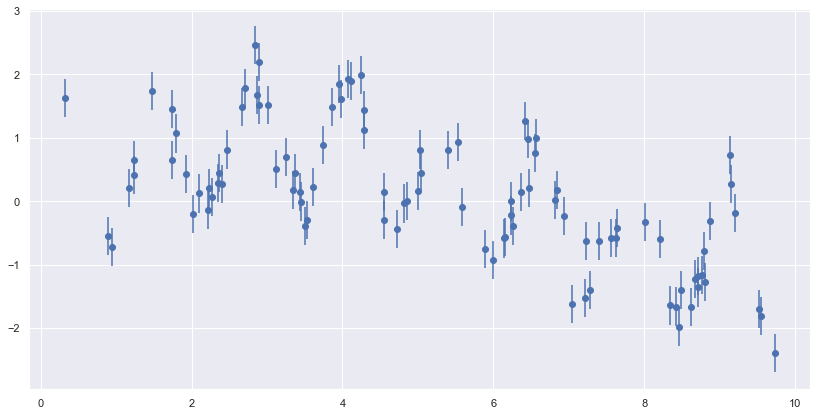

In [181]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


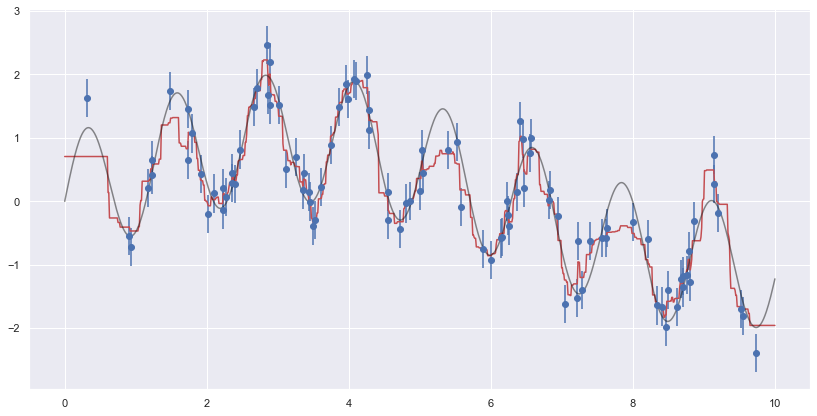

In [182]:

xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

#  Bias and Variance

# Logistic Regression

In [ ]:
As we can see it has high bias so it leads to underfitting

# Decision Tree

# Random Forest